# Metadata
I went to one of my two assigned stores at Lidl, Charlottenstraße 2. I believe I went on October 27th, 2018 at around 2pm.

# Data

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pystan
import pandas as pd

In [2]:
df = pd.read_csv("shop.csv", encoding="latin1")

for i in range(df.shape[0]): 
    for j in range(3):
        if df.iloc[i,(j+1)*2] in ["Evelina",'Kissed by Nature','Kissed By Nature','Kissedbynature evelina','Apfel Evelina']:df.iloc[i,(j+1)*2] = "Evelina"
        elif df.iloc[i,(j+1)*2] in ['Rewe','Rewe Regional','Rewe Beste Wahl Snack Apfel Gala Royal','Rewe Bio','REWE best wahl Italian Granny Smith','REWE Regional Rote Tafelapfel Shampion','Rewe Regional Rote Tal_pfel','rewe','REWE Regional Tafelapfel Elstar','REWE Bio','REWE best wahl Elstar','Rewe beste wahl']:df.iloc[i,(j+1)*2] = "Rewe"
        elif df.iloc[i,(j+1)*2] in ["ALDI",'Gutbio','GutBio' ]:df.iloc[i,(j+1)*2] = "ALDI"
        elif df.iloc[i,(j+1)*2] in ['Edeka','Bauersbeste','Edeka Granny Smith','Edeka Royal Gala/Tenroy']:df.iloc[i,(j+1)*2] = "Edeka"
        elif df.iloc[i,(j+1)*2] in ["Honeycrunch",'Apfel rot Honeycrunch','rot Honeycrunch','Honey crunch', 'Edeka Granny Smith']:df.iloc[i,(j+1)*2] = "Honeycrunch"
        elif df.iloc[i,(j+1)*2] in ['Snack Apfel','Snackapfel']:df.iloc[i,(j+1)*2] = 'Snack Apfel'
        elif df.iloc[i,(j+1)*2] in ['Demeter', 'Jemeter']: df.iloc[i,(j+1)*2] = 'Demeter'
        elif df.iloc[i,(j+1)*2] in ['FRUVEG','Kanzi','Sanifrutta']: continue
        else: df.iloc[i,(j+1)*2] = "No brand"
            
    for j in range(3):
        if df.iloc[i, (j+4)*2] in ['Faitrade Bio Bananen','Fairtrade Bio','Bio Fairtrade','Fairtrade bio bananen','Bio fairtrade','Bio fairtrade bananen','Gut Bio Fairtrade Bio Bananen']: df.iloc[i, (j+4)*2] = "ALDI"
        elif df.iloc[i, (j+4)*2] in ['Fairglobe','Lidl','Lidl Fairglobe','Fairglobe bio','Fairglobe']: df.iloc[i, (j+4)*2] = "LIDL"
        elif df.iloc[i, (j+4)*2] in ['Chiqita','chiquita','Chiquita Bananen','Chicquita']: df.iloc[i, (j+4)*2] = 'Chiquita'
        elif df.iloc[i, (j+4)*2] in ['Tuccan','Tucan','Tuscan']: df.iloc[i, (j+4)*2] = "Tucan"
        elif df.iloc[i, (j+4)*2] in ['Edeka','Gut & Gunstig','Mini','Gut & Gunstig','Mini edeka','Gut & Gunstig','Edeka Bio','Edeka Bio Bananen','Eedeka','Edeka Bananen']: df.iloc[i, (j+4)*2] = 'Edeka'
        elif df.iloc[i, (j+4)*2] in ['rewe','REWE Bio','REWE Bio Bananen','Rewe beste wahl','Rewe beste wahi','REWE best wahl bananen','Rewe Bio','REWE Beste Wahl Bananen','Rewe Beste Wahl']: df.iloc[i, (j+4)*2] = "Rewe"
        elif df.iloc[i, (j+4)*2] in ['Fyffes','Greenyard Fresh','Demeter']: continue
        else: df.iloc[i, (j+4)*2] = "No brand"
    for j in range(3):
        if df.iloc[i,(j+7)*2] in ['REWE bio cherry rispentomaten','REWE Regional romatomaten','Rewe bio','Rewe regional rise','Rewe Rispentomaten','REWE Regional','Rewe Normal','REWE Regional rispentomaten', 'REWE Cocktail-rispentomaten','Cherry REWE Regional','Rewe Regional Rispentomaten','REWE rispentomaten','Rewe','Rewe Regional','Rewe Beste Wahl Snack Apfel Gala Royal','Rewe Bio','REWE best wahl Italian Granny Smith','REWE Regional Rote Tafelapfel Shampion','Rewe Regional Rote Tal_pfel','rewe','REWE Regional Tafelapfel Elstar','REWE Bio','REWE best wahl Elstar','Rewe beste wahl']:df.iloc[i,(j+7)*2] = "Rewe"
        elif df.iloc[i,(j+7)*2] in ['Gut Bio Bio Rispentomaten','Gutbio rispentomaten',"ALDI",'Gutbio','GutBio' ]:df.iloc[i,(j+7)*2] = "ALDI"
        elif df.iloc[i,(j+7)*2] in ['Edeka Cherry','Gut & Gunstig','Edeka Bio','Mini edeka','Edeka','Bauersbeste','Edeka Granny Smith','Edeka Royal Gala/Tenroy']:df.iloc[i,(j+7)*2] = "Edeka"
        elif df.iloc[i,(j+7)*2] in ["Honeycrunch",'Apfel rot Honeycrunch','rot Honeycrunch','Honey crunch', 'Edeka Granny Smith']:df.iloc[i,(j+7)*2] = "Honeycrunch"
        elif df.iloc[i,(j+7)*2] in ['Snack Apfel','Snackapfel']:df.iloc[i,(j+7)*2] = 'Snack Apfel'
        elif df.iloc[i,(j+7)*2] in ['Barther Strauchtomaten','Barther GemÙsegarten','Barther Tomaten',]: df.iloc[i,(j+7)*2] = 'Barther'
        elif df.iloc[i,(j+7)*2] in ['FRUVEG','Kanzi','Sanifrutta']: continue
        else: df.iloc[i,(j+7)*2] = "No brand"        
    for j in range(3):
        if df.iloc[i, (j+10)*2] in ['Bauers Best','Edeka Bio','Mini edeka','Edeka Cherry','Bauersbeste','Edeka', 'Gut & Gunstig', 'Bauers Beste']: df.iloc[i, (j+10)*2] = "Edeka"
        elif df.iloc[i, (j+10)*2] in ['Gut Bio','Bio Cherrytomaten gut bio', 'GutBio', 'Gutbio rispentomaten', 'Gut Bio Bio Rispentomaten', "ALDI"]: df.iloc[i, (j+10)*2] = "ALDI"
        elif df.iloc[i, (j+10)*2] in ['Cherry REWE Regional','REWE Cocktail-rispentomaten','REWE Regional rispentomaten','Rewe Regional Rispentomaten','Rewe Normal','REWE Regional','REWE rispentomaten','rewe','Rewe Rispentomaten','Rewe Regional','Rewe bio','REWE bio cherry rispentomaten','REWE Regional romatomaten','Rewe Bio','Rewe regional rise']: df.iloc[i, (j+0)*2] = 'Rewe'
        elif df.iloc[i, (j+10)*2] in ['Barther Tomaten','Barther GemÙsegarten','Barther Strauchtomaten']: df.iloc[i, (j+10)*2] = "Barther"
        elif df.iloc[i, (j+10)*2] in ['Bioland','Saveol','Tasty Tom', 'The greenery', 'Mondial Strauchtomaten Lose']: continue
        else: df.iloc[i, (j+10)*2] = "No brand"
            
    for j in range(3):
        if df.iloc[i, (j+13)*2] in ['Balbake bio','Belbake bio spelt flour','Balbake bio','Belbake Bio white flour','Balbake', 'Belbake Bio','Belbake','Belbake White flour',]: df.iloc[i, (j+13)*2] = "Belbake"
        elif df.iloc[i, (j+13)*2] in ['Edeka Bio','Edeka','Gut and gÙnstig','Gut & Gunstig']: df.iloc[i, (j+13)*2] = "Edeka"
        elif df.iloc[i, (j+13)*2] in ['GutBio','Gutbio weizenmehl','Gut Bio','Gut Bio dinkelmehl','ALDI','Gutbio dinkelmehl','Gut Bio Bio','Gutbio','Bio Dinkelmehl' ,'Gut bio dinkenmehl','Bio Dinkelmehl','Gut bio dinkenmehl']: df.iloc[i, (j+13)*2] = "ALDI"
        elif df.iloc[i, (j+13)*2] in ['REWE Bio','Rewe Bio','REWE',]: df.iloc[i, (j+13)*2] = 'Rewe'
        elif df.iloc[i, (j+13)*2] in ['ja!','Ja!','ja','Ja']: df.iloc[i, (j+13)*2] = "Ja!"
        elif df.iloc[i, (j+13)*2] in ['Diamante','Diamant','diamant']: df.iloc[i, (j+13)*2] = 'Diamant'
        elif df.iloc[i, (j+13)*2] in ['Schapfen Muhle','Schapfen MÙhle']: df.iloc[i, (j+13)*2] = 'Schapfen Muhle'
        elif df.iloc[i, (j+13)*2] in ['Goldharen weizenmehl','Gold_hren','Goldahren']: df.iloc[i, (j+13)*2] = 'Goldahren'
        elif df.iloc[i, (j+13)*2] in ['Weizenmehl','Alnatura','Dinkel vollkorn mehl']: df.iloc[i, (j+13)*2] = 'Alnatura'
        elif df.iloc[i, (j+13)*2] in ['Aurora pizzamehl','aurora dinkelmehl vollkorn','Volkorn','Volkorn Dinkelmehl','Aurora','Aurora roggenmehl']: df.iloc[i, (j+13)*2] = 'Aurora'
        elif df.iloc[i, (j+13)*2] in ['Baerenmarke''Hansano',"Muller's Muhle",'Nordzucker','Wurzener','Kathi']: continue
        else: df.iloc[i, (j+13)*2] = 'No Brand'
            
    for j in range(3):
        if df.iloc[i, (j+16)*2] in ['Gut und gÙnstig jasmine rice','Gut and GÙnstig','Edeka Parboiled Reis','Edeka Basmati','Gut and GÙnstig','Edeka Basmati Reis','Gut und gÙnstig jasmine rice']: df.iloc[i, (j+16)*2] = "Edeka"
        elif df.iloc[i, (j+16)*2] in []: df.iloc[i, (j+16)*2] = "ALDI"
        elif df.iloc[i, (j+16)*2] in ['Rewe Jasmin Duftreis']: df.iloc[i, (j+16)*2] = 'Rewe'
        elif df.iloc[i, (j+16)*2] in ['Golden Sun Parboiled Reis','Golden Sun Thai Jasmin','Golden Zaun Thai Jasmin','Golden Sun Milk Rice','Golden Sun','Golden Sun Basmati']: df.iloc[i, (j+16)*2] = "Golden Sun"
        elif df.iloc[i, (j+16)*2] in ['Bon Ri Parboiled','Bonri','Bon-Ri Jasmin','Bon-Ri Basmati Reis','Bonri milchreis','Bon-Ri Basmati','Bon-Ri Milchreis','Bonri basmati','Bon-Ri parboiled']: df.iloc[i, (j+16)*2] = "Bon-Ri"
        elif df.iloc[i, (j+16)*2] in ['Wurzener','Spitzen-langkornreis']: df.iloc[i, (j+16)*2] = 'Wurzener'
        elif df.iloc[i, (j+16)*2] in ['Davert','davert','Devita','Davita']: df.iloc[i, (j+16)*2] = 'Davert'
        elif df.iloc[i, (j+16)*2] in ['uncle bens','UncleBens','Davita']: df.iloc[i, (j+16)*2] = 'Uncle Bens'
        elif df.iloc[i, (j+16)*2] in ['ORYZA Basmati','oryza ideal reis','oryza','oryza risotto parlla reis','ideal reis langk.parb']: df.iloc[i, (j+16)*2] = 'Oryza'
        else: df.iloc[i, (j+16)*2] = "No brand"
            
    for j in range(3):
        if df.iloc[i, (j+19)*2] in ['Gut and GÙnstig','EDEKA','Edeka Bio','Belbake White flour',]: df.iloc[i, (j+19)*2] = "Edeka"
        elif df.iloc[i, (j+19)*2] in ['Gutbio Frisch Fettarme Land Milch','Gut Bio','Gutbio Frisch Fettarme Land Milch','GutBio','Gut bio','Gutbio','Gut&Gunstig','Gut & Gunstig']: df.iloc[i, (j+19)*2] = "ALDI"
        elif df.iloc[i, (j+19)*2] in ['Rewe Bio','RWEW Bio','REWE Weidem GVO Frei','REWE Bio Fr. voll','REWE bio','Rewe','REWE best wahl']:df.iloc[i, (j+19)*2] = 'Rewe'
        elif df.iloc[i, (j+19)*2] in ['Milbona frische weide-vollmilch','Milbona Bio','Milbona bio organic','Milbona Frische vollmilch','Milbona Weide','Milbona Bio frische vollmilch','Milbona']: df.iloc[i, (j+19)*2] = "Milbona"
        elif df.iloc[i, (j+19)*2] in ['Milsani Fettarme Milch','Milsani Frische fettarme Milch','Milsani Vollmilch']: df.iloc[i, (j+19)*2] = "Milsani"
        elif df.iloc[i, (j+19)*2] in ['Baren Marke','Barenmarke','Barenmrke','B_ren Marke','Baerenmarke','Baren marke','B_renmarke','Barenmark']: df.iloc[i, (j+19)*2] = "Barenmark"
        elif df.iloc[i, (j+19)*2] in ['ja!','ja','Ja','Ja!','Eel milch ja!','Eel milch']: df.iloc[i, (j+19)*2] = "Ja"
        elif df.iloc[i, (j+19)*2] in ['Hermme Milch','Hemme','Hemme Milch']: df.iloc[i, (j+19)*2] = "Hemme"
        elif df.iloc[i, (j+19)*2] in ['Brandenburg','Mark Brandens','Landfr milch mark brandnb','Mark Brandenberg']: df.iloc[i, (j+19)*2] = 'Mark Brandenberg'
        elif df.iloc[i, (j+19)*2] in ['Meierkamp Frische Alpenmilch','Meierkamp','Meierkamp Frische Weidemilch']: df.iloc[i, (j+19)*2] = "Meierkamp"
        elif df.iloc[i, (j+19)*2] in ['Minus L','Hansano']: continue
        else: df.iloc[i, (j+19)*2] = "No brand"

    for j in range(3):
        if df.iloc[i, (j+22)*2] in ['Gut and GÙnstig','Gut&Gunstig','Edeka Irische Butter','Edeka','EDEKA','Gut & Gunstig','Gut and gÙnstig','Edeka Bio']: df.iloc[i, (j+22)*2] = "Edeka"
        elif df.iloc[i, (j+22)*2] in ['Ja','ja','Ja!','ja!','Ja Butter']: df.iloc[i, (j+22)*2] = "Ja"
        elif df.iloc[i, (j+22)*2] in ['GutBio','Gutbio','Irische butter','Gut Bio']: df.iloc[i, (j+22)*2] = "ALDI"
        elif df.iloc[i, (j+22)*2] in ['Rewe']: df.iloc[i, (j+22)*2] = 'Rewe'
        elif df.iloc[i, (j+22)*2] in ['KerryGold','Kerrygold Irische Markenbutter','Kerrygold extra','Ketty Gold','Kerrygold Original Irische Butter','Kerry Gold','Kerrygold','kerrygold']: df.iloc[i, (j+22)*2] = "Kerrygold"
        elif df.iloc[i, (j+22)*2] in ['Milsani Deutsche Markenbutter']: df.iloc[i, (j+22)*2] = "Milsani"
        elif df.iloc[i, (j+22)*2] in ['Maelkebotte Gesalzem','Maelkebotte ungesalzen','Maelkebotte','Maelkebotte Gesalzem']: df.iloc[i, (j+22)*2] = "Maelkebotte"
        elif df.iloc[i, (j+22)*2] in ['Milbona bio organic','Milbona']: df.iloc[i, (j+22)*2] = "Milbona"
        elif df.iloc[i, (j+22)*2] in ["O'grady",'Irische',"O'Grady",'Ogrady',"O'Grady Irische Butter"]: df.iloc[i, (j+22)*2] = "O 'Grady'"
        elif df.iloc[i, (j+22)*2] in []: continue
        else: df.iloc[i, (j+22)*2] = "No brand"
            
    for j in range(3):
        if df.iloc[i, (j+25)*2] in ['Edeka Eier A','Gut & Gunstig Eier Bodenhaltung','Bio Edeka','Gut and GÙnstig','Gut&Gunstig','Edeka','EDEKA','Gut & Gunstig','Gut and gÙnstig','Edeka Bio']: df.iloc[i, (j+25)*2] = "Edeka"
        elif df.iloc[i, (j+25)*2] in ['Ja','ja! Bio Eier FÙrstenhof','Ja','ja','Ja!','ja!','Ja Butter']: df.iloc[i, (j+25)*2] = "Ja"
        elif df.iloc[i, (j+25)*2] in ['Gutbio Brown','Gutbio A','Gut bio','Gut Bio Bio Eier','GutBio','Gutbio','Irische butter','Gut Bio']: df.iloc[i, (j+25)*2] = "ALDI"
        elif df.iloc[i, (j+25)*2] in ['Rewe Eier Freilandhaltung','Rewe bio','REWE bio','rewe','Rewe beste wahl','REWE Baste Wahl','Rewe Bio Spitz und Bube','REWE Best Wahl','Rewe']: df.iloc[i, (j+25)*2] = 'Rewe'
        elif df.iloc[i, (j+25)*2] in ['Luisenhof','Luisenhof Bodenhaltung']: df.iloc[i, (j+25)*2] = 'Luisenhof'
        elif df.iloc[i, (j+25)*2] in ['Hofland','Hofland Bodenhaltung']: df.iloc[i, (j+25)*2] = 'Hofland'
        elif df.iloc[i, (j+25)*2] in []: continue
        else: df.iloc[i, (j+25)*2] = "No brand"
            
    for j in range(3):
        if df.iloc[i, (j+28)*2] in ['Edeka spiced','Gut & Gunstig Hahnchen Innenbrustfilet','Edeka Natur','Edeka Eier A','Gut & Gunstig Eier Bodenhaltung','Bio Edeka','Gut and GÙnstig','Gut&Gunstig','Edeka','EDEKA','Gut & Gunstig','Gut and gÙnstig','Edeka Bio']: df.iloc[i, (j+28)*2] = "Edeka"
        elif df.iloc[i, (j+28)*2] in ['Ja','ja! Bio Eier FÙrstenhof','Ja','ja','Ja!','ja!','Ja Butter']: df.iloc[i, (j+28)*2] = "Ja"
        elif df.iloc[i, (j+28)*2] in ['Gut Bio Hahn-Brustfilet','Gutbio Brown','Gutbio A','Gut bio','Gut Bio Bio Eier','GutBio','Gutbio','Irische butter','Gut Bio']: df.iloc[i, (j+28)*2] = "ALDI"
        elif df.iloc[i, (j+28)*2] in ['Rewe Bio','RERE Bio','Rewe Eier Freilandhaltung','Rewe bio','REWE bio','rewe','Rewe beste wahl','REWE Baste Wahl','Rewe Bio Spitz und Bube','REWE Best Wahl','Rewe']: df.iloc[i, (j+28)*2] = 'Rewe'
        elif df.iloc[i, (j+28)*2] in ['WB','WB Wilhwlm brandenburg','Wilhelm Brandenburg','Wilhelm Brandeburg','Wilheim Brandenburg','Wilhelm Brandenburg']: df.iloc[i, (j+28)*2] = 'Wilhelm Brandenberg'
        elif df.iloc[i, (j+28)*2] in ['Land Junker','Landjunker']: df.iloc[i, (j+28)*2] = 'Land Junker'
        elif df.iloc[i, (j+28)*2] in ['Metzgerei putenbrustfilet','Meine Fleischerei','Metzgerei hahnchenbrustfilet','Meine Metzgeri','Metzgerei','Meine metzgerei','meine MetzGerei Hahnchen Brustfilet Teilstuck','Maine metzgerei','Meine Metzgerei','Mine Metzgerei']: df.iloc[i, (j+28)*2] = 'Meine Metzgerei'
        elif df.iloc[i, (j+28)*2] in ['Fairmast','FairMast','Fair Mast','FairMast','Fairmast Hahnchen Brustfilet']: df.iloc[i, (j+28)*2] = 'FairMast'
        elif df.iloc[i, (j+28)*2] in []: continue
        else: df.iloc[i, (j+28)*2] = "No brand"
        

In [3]:

branddf = df.iloc[:,0::2].iloc[:,1:]
pricesdf = pd.concat([df.iloc[:,0], df.iloc[:,1::2].iloc[:,1:]], axis = 'columns')
df.iloc[50,1] = 13


store_dict = { 1: 'Lidl', 2: 'Rewe', 3: 'Aldi', 4: 'Edeka' }
type_dict = {1:"Apple", 2:"Banana", 3:"Tomatoes", 4:"Potatoes", 5:"Flour", 6:"Rice", 7:"Milk", 8:"Butter", 9:"Eggs", 10:"Chicken"}
area_dict = {1:"Mitte", 2:"Schoneberg", 3:"Neukooln", 4:"Kreuzberg", 5:"Friedrichshain", 6:"Prenzlauer Berg", 7:"Tiergarten",
             8:"Alt-Trepof", 9:"Wedding", 10:"Gesundbrunnen", 11:"Moabit", 12:"Rummelsburg", 13:"Lichtenberg" }
inv_brand_dict = {j:i for i,j in enumerate(pd.unique(df.iloc[:,::2].iloc[:,1:].values.ravel('K')))}

x = []

for i in range(10): 
    for j in range(55): 
        for g,k in enumerate(pricesdf.iloc[:,3*i+1:3*i+4].values[j]): 
            if not np.isnan(k): 
                x.append([i+1, df.iloc[j,0], int(df.iloc[j,1]), k, inv_brand_dict[branddf.iloc[:,3*i:3*i+3].values[j][g]]]) 
                
data = {
    'N' : len(x),
    'Prices': np.array(x)[:,3].tolist(),
    'Area': list(map(int, np.array(x)[:,2].tolist())),
    'Store': list(map(int,np.array(x)[:,1].tolist())),
    'Product': list(map(int,np.array(x)[:,0].tolist())),
    'Brand': list(map(int,(np.array(x)[:,4]+1).tolist()))
}


#### Model
In this model, there were 6 parameters: the base prices, the multipliers for the stores, the multipliers for the area, the multipliers for the brand, the lambda from which the base prices are exponentially distributed and drawn, and the sigma for the normal distribution that determines the final prices.

I made a few major assumptions about my model:
- The base prices were exponentially distributed based on the parameter lambda
- The parameter lambda itself has a prior in the form of a gamma distribution at (1,1)
- The three multipliers are drawn from a cauchy distribution centered at (1,0.5)
- The prices were normally distributed, with a mean of base * store multiplier * area multiplier * brand multiplier, and with standard deviation sigma
- sigma itself has a cauchy prior centered at (0,1)

In [4]:
stan_code = """
data {  
    int<lower=1> N;
    real<lower=0> Prices[N];  
    int<lower=1, upper=13> Area[N];
    int<lower=1, upper=4> Store[N];
    int<lower=1, upper=10> Product[N];
    int<lower=0> Brand[N];
}

parameters {  
    real<lower=0> base[10];
    real<lower=0> mul_store[4];
    real<lower=0> mul_area[13];
    real<lower=0> mul_brand[54];
    
    real<lower = 0> lambda;
    real<lower = 0> sigma;
}

model {
    lambda ~ gamma(1,1);
    sigma ~ cauchy(0,1);
    
    for (i in 1:10){ 
       base[i] ~ exponential(lambda);
    }  
    for (i in 1:4){
        mul_store[i] ~ cauchy(1,0.5);
    }
    for (i in 1:13){
        mul_area[i] ~ cauchy(1,0.5);
    }
    for (i in 1:54){
        mul_brand[i] ~ cauchy(1,0.5);
    }
    
    for (i in 1:N){
        Prices[i] ~ normal(base[Product[i]] * mul_area[Area[i]] * mul_store[Store[i]] * mul_brand[Brand[i]], sigma);
    }
}

"""

stan_model = pystan.StanModel(model_code=stan_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_2d5c9d785c9d14baa75221c70ebcff7e NOW.


In [12]:
fit = stan_model.sampling(data=data, chains=8, iter=20000, seed = 69)

The multiplier for the base prices are given below. Unsurprisingly, the most expensive product is by far the chicken at a price of 7 euros per kilogram. The next two closest are the butter and tomatoes, at approximately 2.53 and 2.02 euros per kilogram respectively.

Inference for Stan model: anon_model_2d5c9d785c9d14baa75221c70ebcff7e.
8 chains, each with iter=20000; warmup=10000; thin=1; 
post-warmup draws per chain=10000, total post-warmup draws=80000.

           mean se_mean     sd   2.5%    50%  97.5%  n_eff   Rhat
base[1]    1.34  4.9e-3   0.39    0.7   1.29   2.23   6375    1.0
base[2]    0.88  3.3e-3   0.27   0.45   0.85   1.51   6932    1.0
base[3]    2.01  7.4e-3   0.58   1.06   1.94   3.35   6216    1.0
base[4]    0.84  3.1e-3   0.26   0.43   0.81   1.44   6917    1.0
base[5]    0.73  2.6e-3   0.25   0.35    0.7    1.3   8716    1.0
base[6]    1.61  5.9e-3   0.47   0.85   1.56   2.69   6379    1.0
base[7]    0.56  2.1e-3   0.19   0.27   0.54    1.0   7869    1.0
base[8]    2.51  9.2e-3   0.73   1.34   2.43   4.18   6211    1.0
base[9]    1.77  6.5e-3   0.52   0.94   1.72   2.96   6319    1.0
base[10]   7.18    0.03   2.06   3.83   6.96  11.88   6110    1.0

Samples were drawn using NUTS at Tue Nov 13 22:13:00 2018.
For each parameter, n

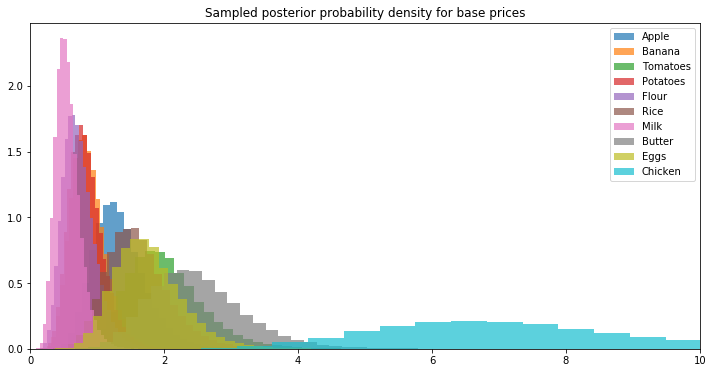

In [15]:
print(fit.stansummary(pars=['base'], probs=[0.025, 0.5, 0.975]))
posterior = fit.extract()

plt.figure(figsize = (12,6))
plt.title('Sampled posterior probability density for base prices')
for i in range(10):
    plt.hist(posterior['base'][:,i],bins=50, density = True, alpha = 0.7, label = type_dict[i+1]) 
plt.xlim((0,10))
plt.legend()
plt.show()

The multipliers for the stores showed less variability. The most expensive store was Edeka, followed by Aldi, Rewe, and Lidl. However, Edeka, Rewe and Aldi are within one standard deviation of each other, so the differences between them are not statistically significant under a frequentist interpretation of probability.

Inference for Stan model: anon_model_2d5c9d785c9d14baa75221c70ebcff7e.
8 chains, each with iter=20000; warmup=10000; thin=1; 
post-warmup draws per chain=10000, total post-warmup draws=80000.

               mean se_mean     sd   2.5%    50%  97.5%  n_eff   Rhat
mul_store[1]   0.72  2.1e-3   0.19   0.44   0.69   1.19   8464    1.0
mul_store[2]   1.22  3.5e-3   0.32   0.74   1.17   2.01   8352    1.0
mul_store[3]   1.39  4.0e-3   0.37   0.85   1.33   2.29   8354    1.0
mul_store[4]   1.41  4.1e-3   0.37   0.86   1.35   2.32   8275    1.0

Samples were drawn using NUTS at Tue Nov 13 22:13:00 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


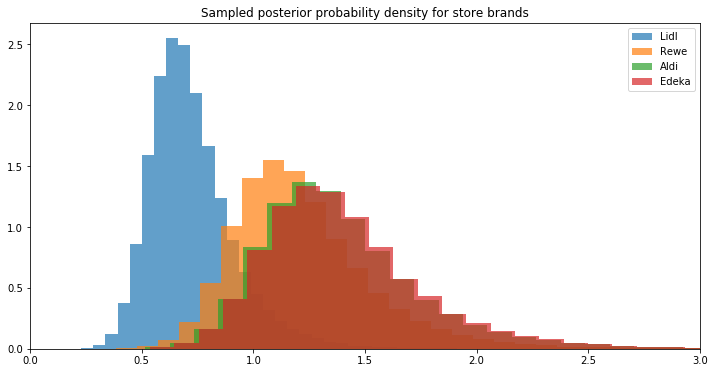

In [19]:
print(fit.stansummary(pars=['mul_store'], probs=[0.025, 0.5, 0.975]))
plt.figure(figsize = (12,6))
plt.title('Sampled posterior probability density for store brands')
for i in range(4):
    plt.hist(posterior['mul_store'][:,i],bins=50, density=True, alpha = 0.7, label = store_dict[i+1]) 
plt.xlim((0,3))    
plt.legend()
plt.show()

As for the neighborhoods, the most expensive neighborhood was found to be Wedding, and the cheapest was Alt-Trepof.

Inference for Stan model: anon_model_2d5c9d785c9d14baa75221c70ebcff7e.
8 chains, each with iter=20000; warmup=10000; thin=1; 
post-warmup draws per chain=10000, total post-warmup draws=80000.

               mean se_mean     sd   2.5%    50%  97.5%  n_eff   Rhat
mul_area[1]     1.3  1.8e-3   0.16   1.01   1.29   1.65   7788    1.0
mul_area[2]    0.82  1.2e-3   0.12    0.6   0.81   1.08  11302    1.0
mul_area[3]    0.93  1.3e-3   0.12   0.72   0.93   1.19   8268    1.0
mul_area[4]    1.39  1.9e-3   0.17   1.08   1.38   1.76   7898    1.0
mul_area[5]    1.24  1.7e-3   0.15   0.96   1.23   1.57   7906    1.0
mul_area[6]    1.18  1.6e-3   0.15   0.91   1.17    1.5   8394    1.0
mul_area[7]    1.04  1.5e-3   0.14   0.79   1.04   1.35   9228    1.0
mul_area[8]    0.91  1.3e-3   0.14   0.66    0.9    1.2  11989    1.0
mul_area[9]    1.56  2.3e-3   0.28   1.08   1.54   2.18  15262    1.0
mul_area[10]   0.96  1.3e-3   0.17   0.66   0.96   1.32  15764    1.0
mul_area[11]   1.49  2.1e-3    0.2   

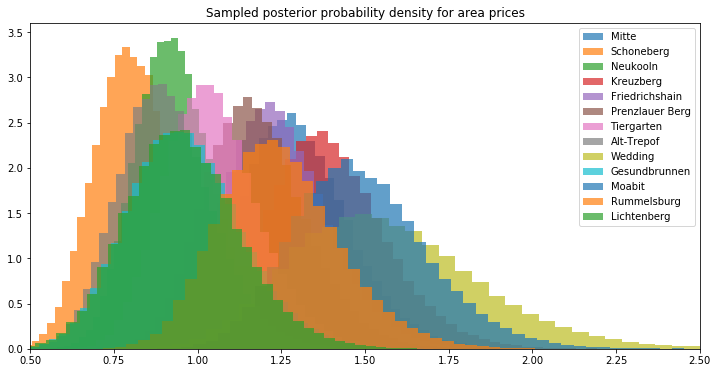

In [22]:
print(fit.stansummary(pars=['mul_area'], probs=[0.025, 0.5, 0.975]))
plt.figure(figsize = (12,6))
plt.title('Sampled posterior probability density for area prices')
for i in range(13):
    plt.hist(posterior['mul_area'][:,i], bins=50, density=True, alpha = 0.7, label = area_dict[i+1]) 
plt.xlim((0.5,2.5))
plt.legend()
plt.show()

The most expensive brand, quite surprisingly, is 'Rewe bio'. There may be significant overfitting here.

Inference for Stan model: anon_model_2d5c9d785c9d14baa75221c70ebcff7e.
8 chains, each with iter=20000; warmup=10000; thin=1; 
post-warmup draws per chain=10000, total post-warmup draws=80000.

                mean se_mean     sd   2.5%    50%  97.5%  n_eff   Rhat
mul_brand[1]    1.21  1.2e-3   0.12    1.0   1.21   1.47   9388    1.0
mul_brand[2]    1.22  1.6e-3   0.35   0.58    1.2   1.99  46259    1.0
mul_brand[3]    0.99  1.3e-3    0.3   0.39   0.99   1.61  51657    1.0
mul_brand[4]    1.73  1.8e-3   0.19   1.39   1.72   2.13  10952    1.0
mul_brand[5]    1.01  1.7e-3   0.39   0.25    1.0   1.85  50761    1.0
mul_brand[6]    0.79  8.0e-4   0.08   0.64   0.78   0.97  11095    1.0
mul_brand[7]    0.98  1.9e-3   0.44   0.15   0.96   1.95  52753    1.0
mul_brand[8]    1.11  1.3e-3   0.29   0.58    1.1   1.72  49448    1.0
mul_brand[9]     1.2  1.2e-3   0.13   0.97   1.19   1.48  11561    1.0
mul_brand[10]   0.98  1.4e-3   0.29   0.41   0.98   1.59  45028    1.0
mul_brand[11]   1.39  2.6e

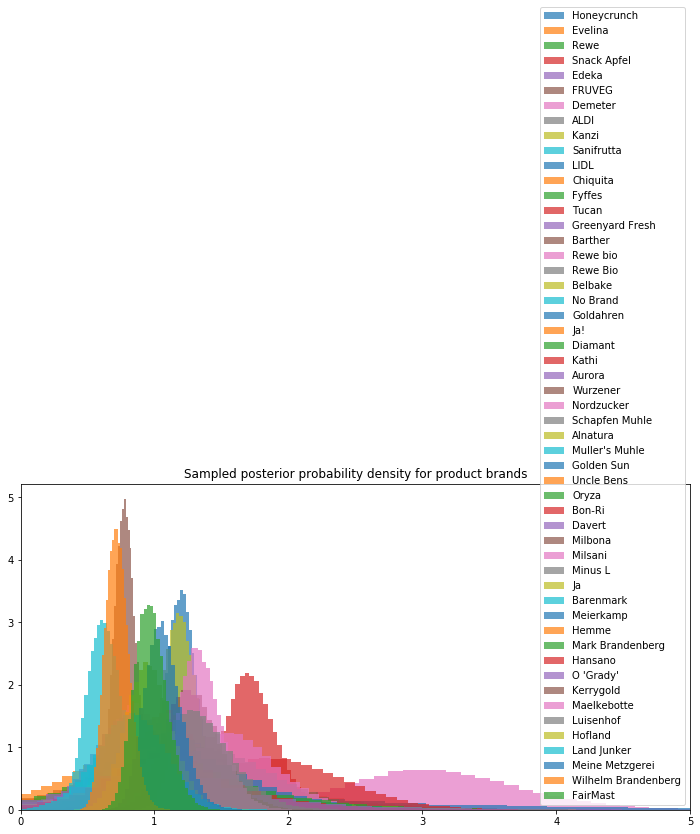

In [32]:
print(fit.stansummary(pars=['mul_brand'], probs=[0.025, 0.5, 0.975]))
plt.figure(figsize = (12,6))
plt.title('Sampled posterior probability density for product brands')
brand_dict = {i:j for i,j in enumerate(pd.unique(df.iloc[:,::2].iloc[:,1:].values.ravel('K')))}
for i in range(53):
    plt.hist(posterior['mul_brand'][:,i], bins=50, density=True, alpha = 0.7, label = brand_dict[i+1]) 
plt.xlim((0,5))
plt.legend()
plt.show()

When compared with rental prices, there was a moderate correlation between the area multiplier and the rent price.

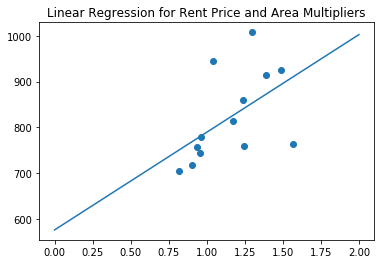

The pearsons coefficient is: 0.5214691891279987


In [33]:
mitte = [1044,1048,1154,1090,1002,1090,999,902,942,893,932,957,1048]
schoneberg = [797,705,778,855,844,701,703,629,609,678,633,621,611]
neukooln = [812,872,820,743,801,836,757,617,640,680]
kreuzberg = [865,854,895,941,908,1005,934,826,1005]
friedrichschain = [976,877,846,842,942,892,809,863,976,736,752,809]
prenzauler_berg = [856,893,902,719,766,802,886,769,739]
tiergarten = [1048,957,859,916]
alt_tempelhof = [743,755,730,641]
wedding = [769,778,773,741,753]
gesundbrunnen = [802,893,739,746,719]
moabit = [932,957,886]
rummelsburg = [774,804,702]
lichtenburg = [739,736,752,809,734,691]

empiricalmeans = []
for i in [mitte, schoneberg, neukooln, kreuzberg, friedrichschain, prenzauler_berg, tiergarten, alt_tempelhof, wedding, gesundbrunnen, moabit, rummelsburg, lichtenburg]:
    empiricalmeans.append(np.mean(i))
    
x= stats.linregress(np.mean(posterior['mul_area'], axis=0), empiricalmeans)

slope, intercept, r = x[0:3]


x = np.linspace(0,2)

plt.scatter(np.mean(posterior['mul_area'], axis=0),empiricalmeans)
plt.plot(x, intercept + slope*x)
plt.title("Linear Regression for Rent Price and Area Multipliers")
# plt.xlabel('Area Multipliers')
# plt.ylabel('Rent Prices')
plt.show()

print('The pearsons coefficient is: ' + str(r))